## Описание проекта
**Цели и задачи проекта** - на основании данных интернет-магазина, продающего по всему миру компьютерные игры, вывить факторы, определяющие успешность игры. 

**Описание данных** <br>
•	Name — название игры<br/>
•	Platform — платформа<br/>
•	Year_of_Release — год выпуска<br/>
•	Genre — жанр игры<br/>
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)<br/>
•	EU_sales — продажи в Европе (миллионы проданных копий)<br/>
•	JP_sales — продажи в Японии (миллионы проданных копий)<br/>
•	Other_sales — продажи в других странах (миллионы проданных копий)<br/>
•	Critic_Score — оценка критиков (максимум 100)<br/>
•	User_Score — оценка пользователей (максимум 10)<br/>
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br/>


# Содержание 

1. [Изучение общей информации о данных](#introduction)


2. [Подготовка данных](#paragraph1)

    2.1 [Приведение столбцов к нижнему регистру](#subparagraph1) 
    
    2.2 [Изменение типа данных](#subparagraph2)
    
    2.3 [Заполнение пропусков](#subparagraph3) 
    
    
3. [Исследовательский анализ данных](#paragraph3)

    3.1 [Анализ количества игр, выпускаемых в разные годы](#subparagraph4) 
    
    3.2 [Анализ изменения продаж по платформам](#subparagraph5)
    
    3.3 [Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам](#subparagraph6)
    
    3.4 [Влияние отзывов покупателей и критиков на продажи платформ](#subparagraph7)
    
    3.5 [Анализ игр по жанрам](#subparagraph8)
    
    
4. [Составление портрета пользователя для каждого региона](#paragraph5)

    4.1[Предварительная обработка данных](#subparagraph9)
    
    4.2[Написание функции для отрисовки графиков](#subparagraph10)
    
    4.3[Выявление самых популярных платформ в регионах](#subparagraph11)
    
    4.4[Выявление самых популярных жанров в регионах](#subparagraph12)
    
    4.5[Выявление влияния рейтинга на продажи в отдельном регионе](#subparagraph13)
    
 
5. [Проверка гипотез](#paragraph6)

    5.1 [Проверка первой гипотезы](#subparagraph14)
    
    5.2 [Проверка второй гипотезы](#subparagraph15)
    
    
6. [Формулирование выводов](#paragraph7)

Шаг 1. Изучение общей информации <a name="introduction"></a>
===========================

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
import seaborn as sns
#изучим общую информацию об играх
games = pd.read_csv('/datasets/games.csv')
games.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


В таблице с информацией о пользователях 11 столбцов (6 столбцов с числовыми данными и 5 столбцов с объектами). Пропусков в данных довольно много -  в особенности в столбцах с оценками пользователей (наблюдаем пропуски в стоблцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating').
Видимо, что у столбцов с датой релиза ('year_of_release') и у с оценка пользователя ('user_score') форматы объекта => необходимо их заменить на формат date и float соответственно.

In [2]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Шаг 2. Подготовка данных<a name="paragraph1"></a>
===========================

## 2.1 Приведение названия столбцов к нижнему регистру
<a name="subparagraph1"></a>

In [3]:
games.columns = map(str.lower, games)

In [4]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*2.2 Изменение типа данных в столбце 'user_score'* <a name="subparagraph2"></a>

In [5]:
#посмотрим на уникальные значения в столбце 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можем видеть в списке аббревиатуру 'tbd'. Подумаем, как обработать данное значение.

In [6]:
#посмотрим на количество 'tbd' в списке значений с оценками пользователей
games[games['user_score'] == 'tbd']['user_score'].count()

2424

2424 строк со значением 'tbd' в оценках пользователей. Гугл сообщает, что данная аббревиатура обозначает "to be determined" - то есть указывает на отстутсвие оценок пользователей, например, вследствие малого количества отзывов. Следовательно, 'tbd' можно интерпретировать как отсутствующее значение. Заменим 'tbd' на NaN.

In [7]:
#заменим 'tbd' на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [8]:
#приведем значения в 'user_score' к формату float
games['user_score'] = games['user_score'].astype('float')

## 2.3 Изменение типа данных в столбце 'year_of_release'

<a name="subparagraph3"></a>

In [9]:
#приведем данные в столбце 'year_of_release' к формату даты
games['year'] = pd.to_datetime(games['year_of_release'], format = '%Y')

## 2.4 Заполнение пропусков
<a name="subparagraph4"></a>

Рассчитаем количество и процент пропусков в столбцах

In [10]:
games['name'].isna().sum()
games['name'].isna().sum()/len(games)*100

0.011965300628178284

В столбце c названием игр доля пропусков очень низкая - 0,01% всех наблюдений => можем их оставить в данных, они не сместят наши результаты. 

In [11]:
games['year_of_release'].isnull().sum()
games['year_of_release'].isnull().sum()/len(games)*100

1.609332934489979

In [12]:
games.dropna(subset = ['year_of_release'], inplace = True)

В столбце в годом выпуска игры доля пропусков низкая - составляет 1,6% всех наблюдений => удалим их.

In [13]:
games['genre'].isnull().sum()/len(games)*100

0.012161011796181443

В столбце с жанров доля пропусков низкая - составляет 0,01% всех наблюдений => можем их оставить в данных, они не сместят наши результаты. 

In [14]:
games['critic_score'].isnull().sum()/len(games)*100

51.45932141554177

В столбце с оценкой критиков **'critic_score'** доля пропусков значительная - 51,3% всех наблюдений. Возможно пропуски связаны с тем, что игры имеют низкую популярность, и, как следствие, критики не осуществляли их обзор. Возникает вопрос, как заполнить пропуски? Заполнение медианными или средними значениями исходя из жанра игры или платформы сместит оценки, поскольку оценка критиков находится в тесной зависимости от иных характеристик игры, которые не представлены в таблице. Поэтому заполним данные пропуски индикаторной переменной, равной -1, чтобы можно было отличить строки с нулевым и отсутствующим рейтингом.

In [15]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [16]:
games['user_score'].isnull().sum()/len(games)*100

54.62118448254895

В столбце с оценками пользователей **'user_score'** ситуация аналогичная - количество пропусков значительное, они составляют 54,6% всех наблюдений. Заполнение пропусков усредненными данными, сгруппированными по какому-либо признаку, приведет к смещению оценок. Поэтому заполним пропуски индикаторным значением, равным единице. 

In [17]:
games['user_score'] = games['user_score'].fillna(-1)

In [18]:
games['rating'].isnull().sum()/len(games)*100

40.60561838744984

В столбце с рейтингом **'rating'** пропуски составляют 40,5% наблюдений. Отсутствие рейтинга можно быть связано с тем, что в годы выхода игры на рынок организация ERSB, специализирующаяся на присвоении рейтинга, еще не существовала. Мы не имеем достаточно данных для восстановления пропусков: данных по году выпуска, платформе, жанру недостаточно для точного восстановления значений. По аналогии со значениями в столбцах оценками заполним пропуски индикаторным значением, равным единице. 

In [19]:
games['rating'] = games['rating'].fillna(-1)

**Вывод по разделу с заполнением пропусков:** 
- т.к. пропуски в столбцах 'name', 'year_of_release', 'genre' составляют менее 2% выборки, оставили их без заполнения; 
- пропуски в столбцах с оценками и рейтингом ('critic_score', 'user_score' и 'rating') составляют более 40% выборки => т.к. заполнение их усредненными значениями, сгруппированными по жанру, используемой платформе или году выхода, является ошибочным и может привести к смещению оценок, заполнили их индикаторным значением, равным -1. 

## 2.5 Расчет суммарных продаж во всех регионах

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Шаг 3. Исследовательский анализ данных <a name="paragraph3"></a>
===========================

## 3.1 Анализ количества игр, выпускаемых в разные годы
<a name="subparagraph4"></a>

In [21]:
games_by_year = games.groupby('year_of_release')['name'].count()

In [22]:
print(games_by_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


Text(0, 0.5, 'Количество игр')

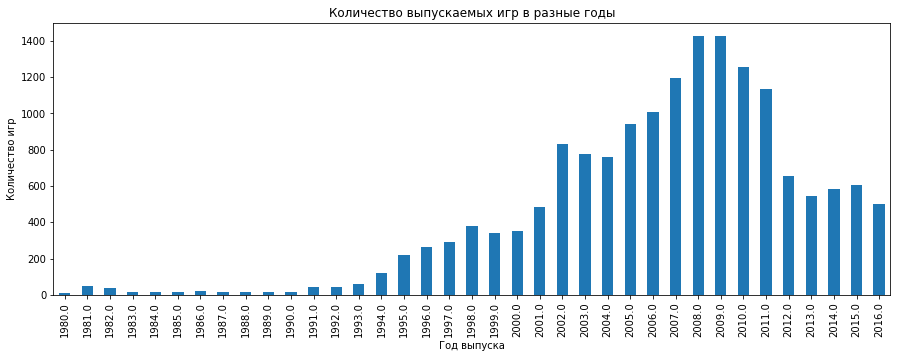

In [23]:
games_by_year.plot(kind='bar', y= 'year_of_release', figsize = (15, 5))
plt.title('Количество выпускаемых игр в разные годы')
plt.xlabel('Год выпуска')  
plt.ylabel('Количество игр')

На основании представленного графика можно заключить, что до 1994 года выпускалось малое количество игр, что вероятно обусловлено малой мощностью существующих операционных систем. В период с 1994 по 2009 гг. по мере развития операционных систем и персональных компьютеров наблюдается последовательный рост количества выпускаемых игр с пиком в 2008-2009 гг. Затем до 2016 год наблюдается постепенное снижение числа выпускаемых игр, что может объясняться появлением иных форм развлечения - социальные сети, YouTube и т.д. Исходя из представленной динамики, можно предположить, что актуальным для нас будет анализ **в период с 2000 по 2016 гг.** с целью прогнозирования продаж на 2017 г.

## 3.2 Анализ изменения продаж по платформам
<a name="subparagraph5"></a>

In [24]:
platform_sales = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

In [25]:
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Количество продаж')

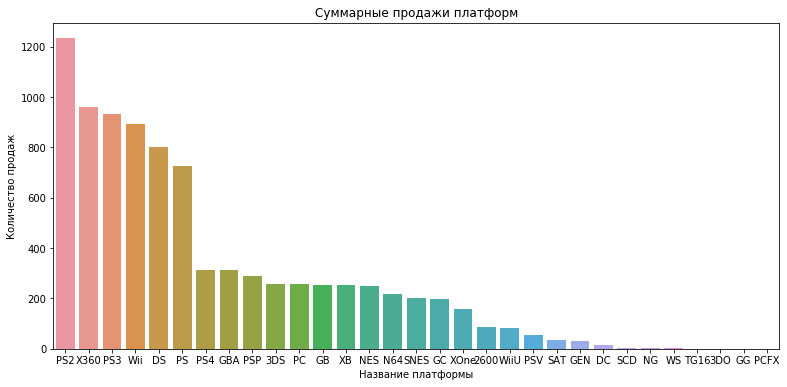

In [26]:
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index, y=platform_sales['total_sales'])
plt.title('Суммарные продажи платформ')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

Из перечня платформ можно выделить 6 платформ с наибольшими суммарными продажами. Выведем топ 6 платформ на экран.

In [27]:
#выведем 6 платформ с наибольшими продажами
top_platforms = platform_sales.head(6)
top_platforms = top_platforms.reset_index()
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Посмотрим на динамику продаж по каждой платформе в период с 2000 по 2016 гг. 

In [28]:
#напишем функцию, которая возвращает сводную таблицу с динамикой объем продаж игр для каждой платформы в период после 2000 г.
def platform_year_sales(name, data):
    return data[(data['platform']==name) & (data['year_of_release']>=2000)].pivot_table(index='year_of_release', values ='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

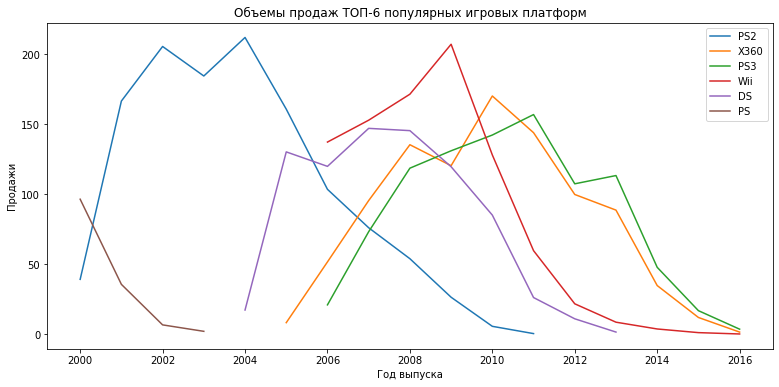

In [29]:
#нарисуем графики для объемов продаж игровых платформ за последние 16 лет
plt.figure(figsize=(13,6))
plt.title('Объемы продаж ТОП-6 популярных игровых платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

for i in list(top_platforms['platform']):
    sns.lineplot(data=platform_year_sales(i, games)['total_sales'], label=i)
    plt.legend()

На основании представленного графика можно заключить, что в среднем с момента первого появления игровой платформы до ее ухода с рынка проходит 10 лет. При этом пик продаж обычно наступает где-то через 5 лет после первого появления платформы на рынке. 
В последние годы самыми продоваемыми платформами являются платформы X360 и PS3. Продажи Wii достигли рекзого пика в 2009 г., за которым последовало такое же стремительное снижение.  

Создадим датафрейм с актуальным для анализа периодом с 2006 по 2016 г., который позволяет уловить одновременно старые платформы, которые начинают уходить с рынка, и новые платформы, которые находятся в активной фазе продаж

In [30]:
actual_games = games[(games['year_of_release'] > 2006) & (games['year_of_release'] <= 2016)].copy()

In [31]:
actual_platform_sales = actual_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

In [32]:
#напишем функцию, которая возвращает сводную таблицу с динамикой объем продаж игр для каждой платформы 
def platform_year_sales_actual(name, data):
    return data[data['platform']==name].pivot_table(index='year_of_release', values ='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning:

Attempting to set identical left == right == 2007.0 results in singular transformations; automatically expanding.



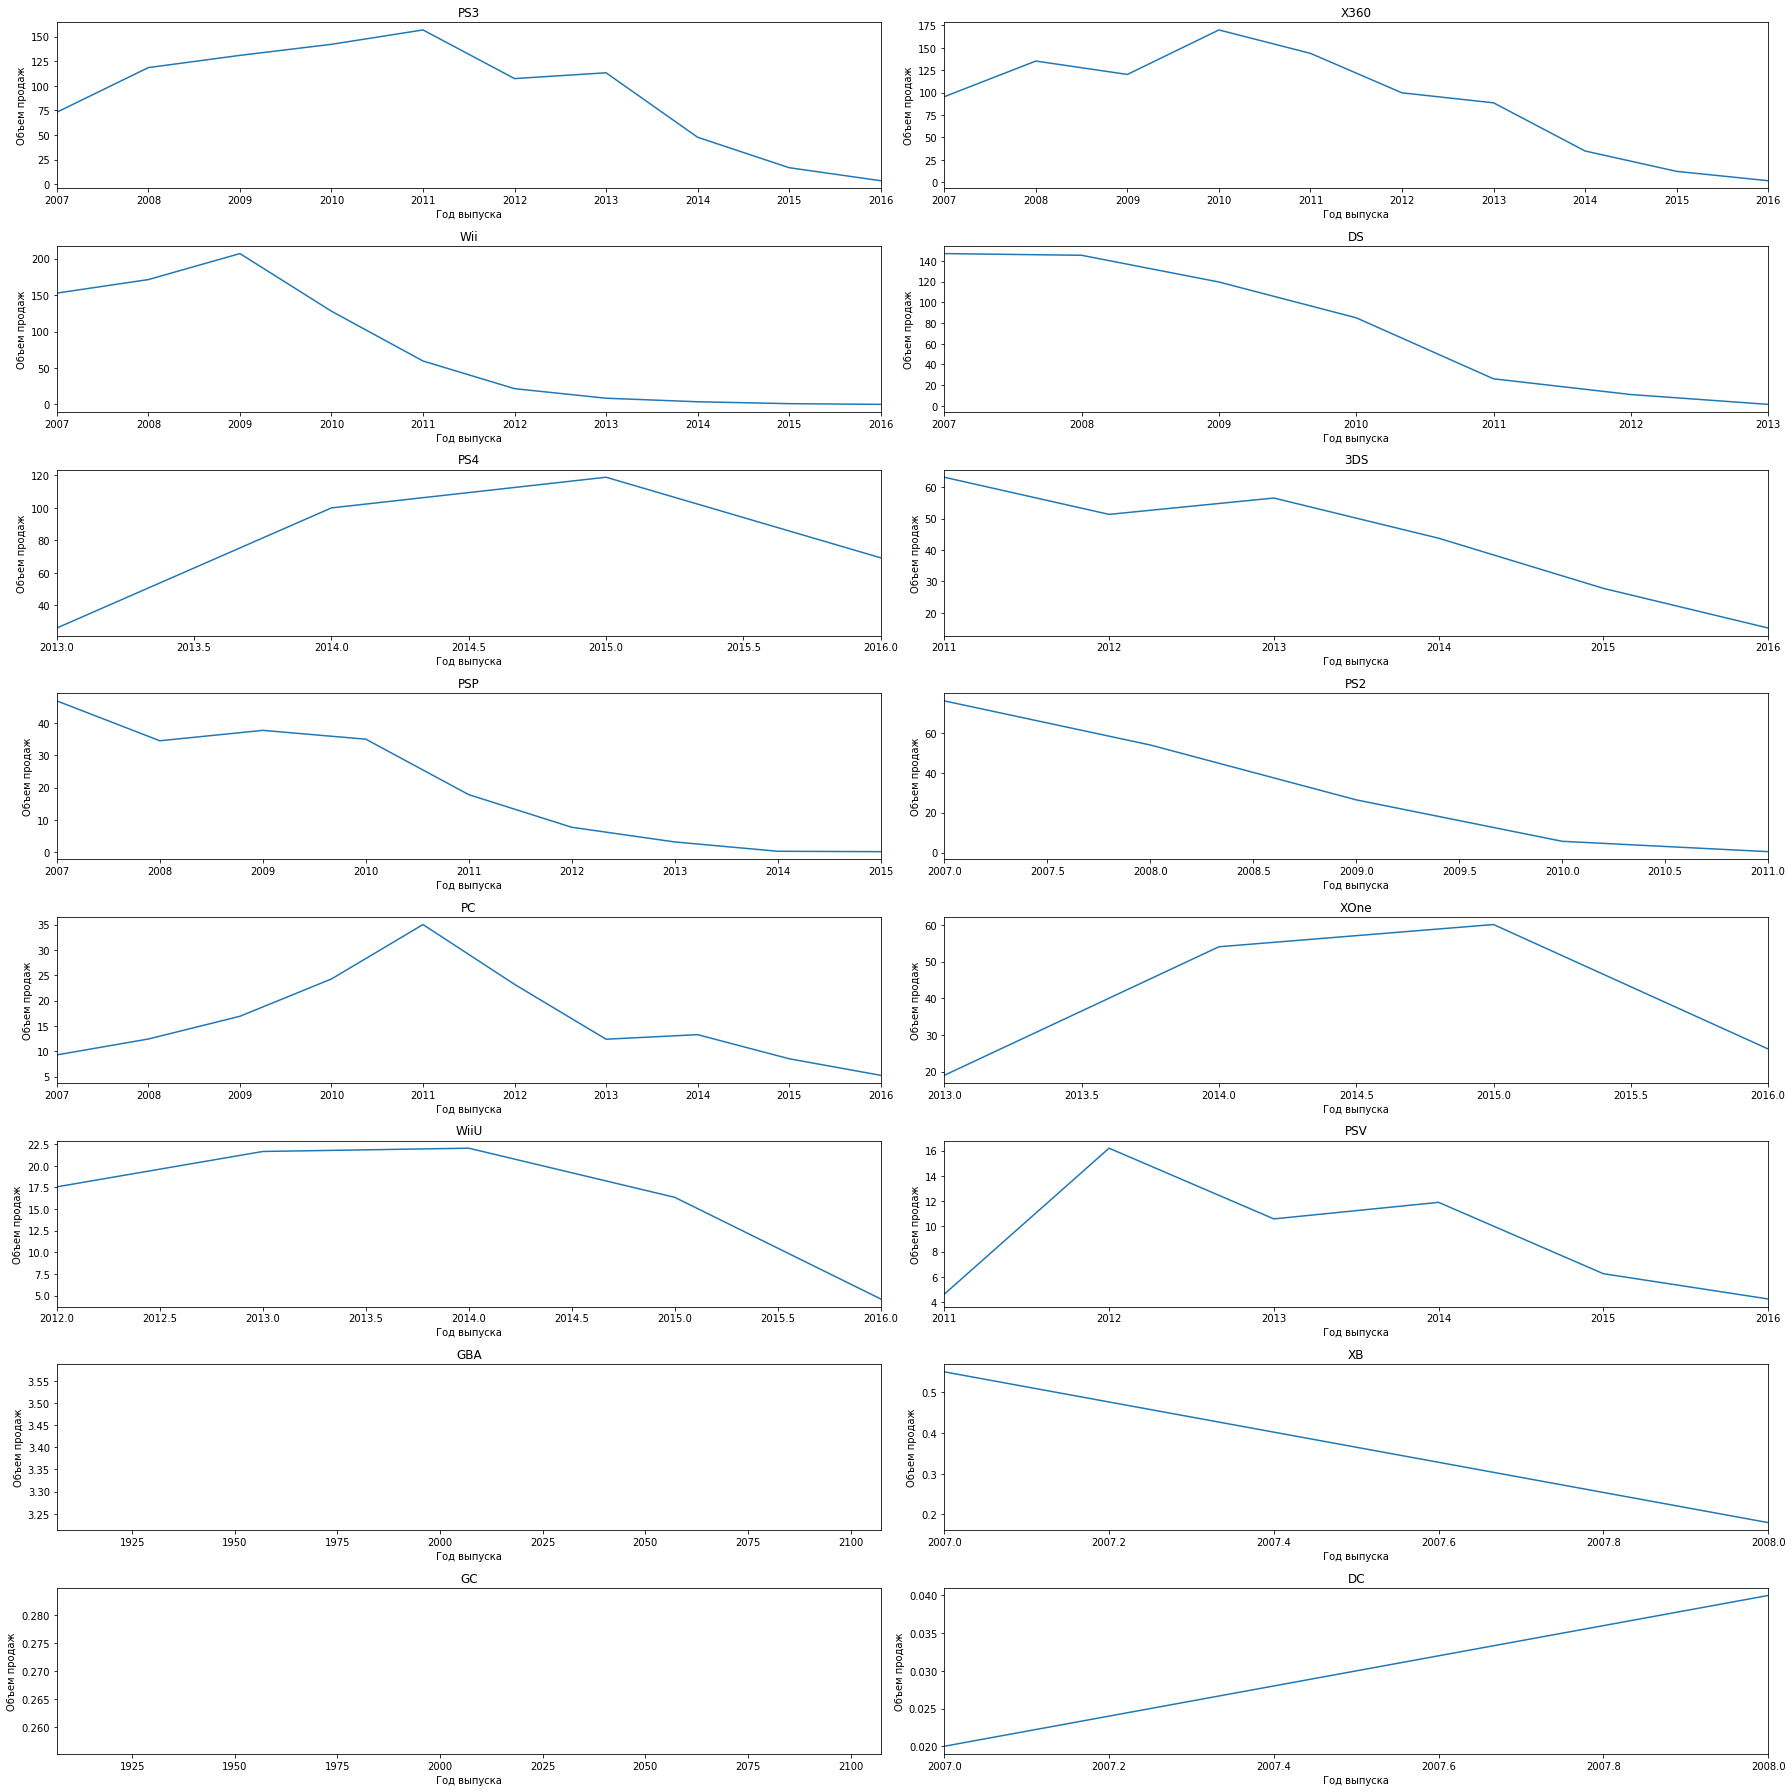

In [33]:
#поскольку важно отразить динамику по всем платформам, чтобы выявить циклы, на которых они находятся, разобьем линейчатый график на несколько диаграмм для более ясной картины
list_1 = list(actual_platform_sales.index)
rows = 8
cols = (len(list_1) // rows)
fig, ax = plt.subplots(rows, cols)
count = 0
for row in range(rows):
    for col in range(cols):
        platform = list_1[count]
        platform_year_sales_actual(platform, actual_games)['total_sales'].plot(ax=ax[row, col], figsize=(25,25), title = platform).set(xlabel = 'Год выпуска', ylabel = 'Объем продаж')
        count += 1
plt.tight_layout()
plt.show()

На основании представленных линейных  можно заключить, что большая часть плафторм находится на закате существования. Потенциал сохранения роста есть у платформ **PS4** и **XOne**.

## 3.3 Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам
<a name="subparagraph6"></a>

In [34]:
#создадим срез данных с продажами по топовым платформам
list_of_top_6_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
largest_platforms = games[games['platform'].isin(list_of_top_6_platforms)]

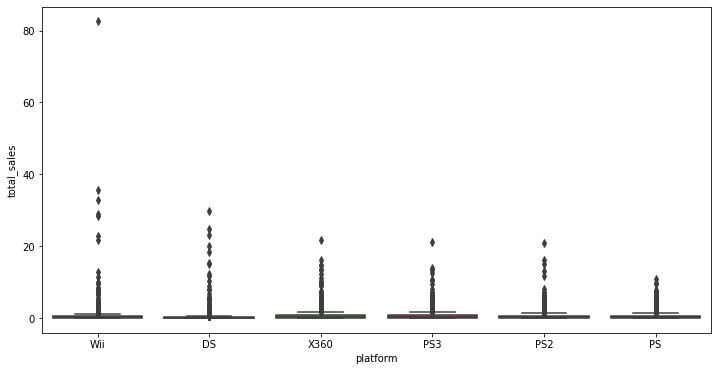

In [35]:
#выведем диаграмму размаха
plt.figure(figsize=(12,6))
sns.boxplot(data=largest_platforms, x='platform', y='total_sales')

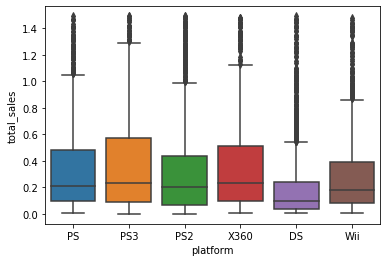

In [36]:
#для более четкого выявления расположения медианы приблизим график
#избавимся от выбросов
largest_platforms = largest_platforms[largest_platforms['total_sales'] < 1.5]
sns.boxplot(data=largest_platforms, x='platform', y='total_sales')

На основании диаграммы размаха можно заключить, что наибольшое медианные продажи на игру в порядке убывания у платформ PS3, X360, PS2, Wii.

In [37]:
#создадим срез данных с продажами по топовым актуальным платформам
list_of_top_2_platforms = ['PS4', 'XOne']
best_platforms = games[games['platform'].isin(list_of_top_2_platforms)]

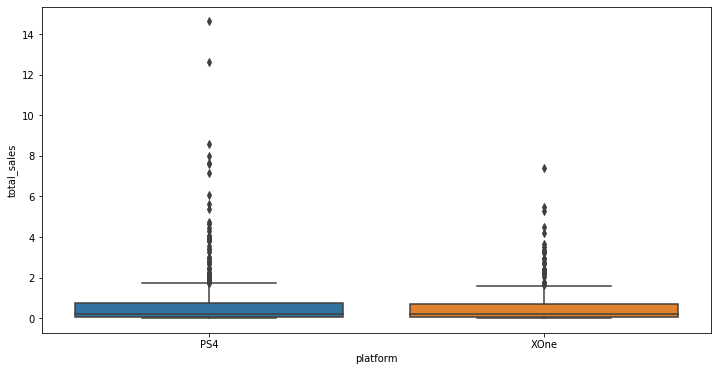

In [38]:
#выведем диаграмму размаха
plt.figure(figsize=(12,6))
sns.boxplot(data=best_platforms, x='platform', y='total_sales')

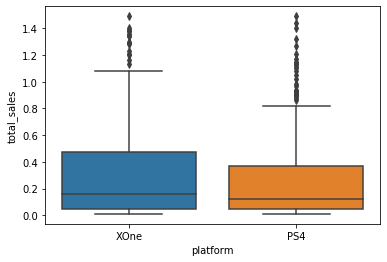

In [39]:
#для более четкого выявления расположения медианы приблизим график
#избавимся от выбросов
best_platforms = best_platforms[best_platforms['total_sales'] < 1.5]
sns.boxplot(data=best_platforms, x='platform', y='total_sales')

На основании диаграммы размаха можно заключить, что у платформы XOne более высокие медианные продажи, чем у платформы PS4. 

## 3.4 Влияние отзывов покупателей и критиков на продажи платформ
<a name="subparagraph7"></a>

В качестве базы для сравнения влияния отзывов на продажи по плафтормами возьмем одну из наиболее свежих платформ - PS4.

In [41]:
#Рассчитем коррелцию между продажами и оценками пользователей для платформы PS4
games_ps4 = games[(games['platform'] == 'PS4') & (games['user_score'] > 0)]
games_ps4['user_score'].corr(games_ps4['total_sales'])

-0.031957110204556424

Text(0, 0.5, 'Суммарные продажи')

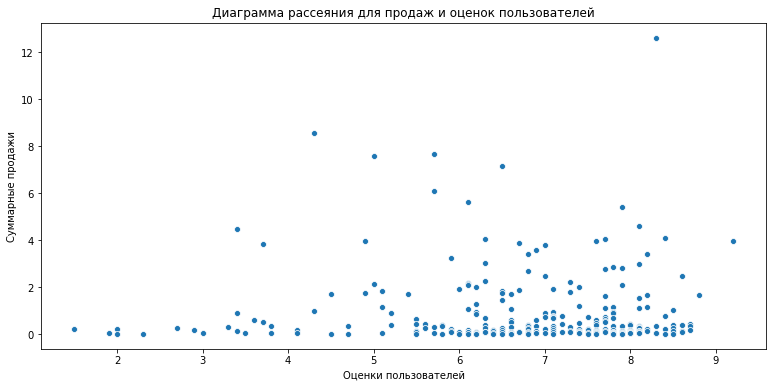

In [42]:
#Отрисуем диаграмму рассеяния для выявления взаимосвязи между продажами и оценками пользователей
plt.figure(figsize=(13,6))
sns.scatterplot(x='user_score', y='total_sales', data = games_ps4)
plt.title('Диаграмма рассеяния для продаж и оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')

Text(0, 0.5, 'Суммарные продажи')

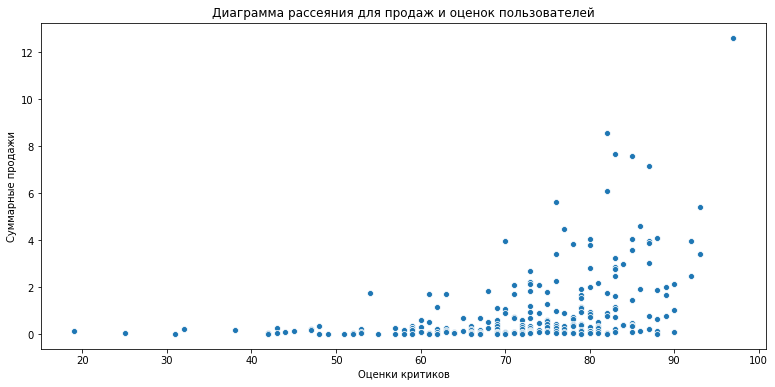

In [43]:
#Отрисуем диаграмму рассеяния для выявления взаимосвязи между продажами и оценками критиков
games_ps4 = games[(games['platform'] == 'PS4') & (games['critic_score'] > 0)]
plt.figure(figsize=(13,6))
sns.scatterplot(x='critic_score', y='total_sales', data = games_ps4)
plt.title('Диаграмма рассеяния для продаж и оценок пользователей')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')

In [44]:
#рассчитаем корреляцию между оценкой критиков и продажами
games_ps4['critic_score'].corr(games_ps4['total_sales'])

0.40656790206178095

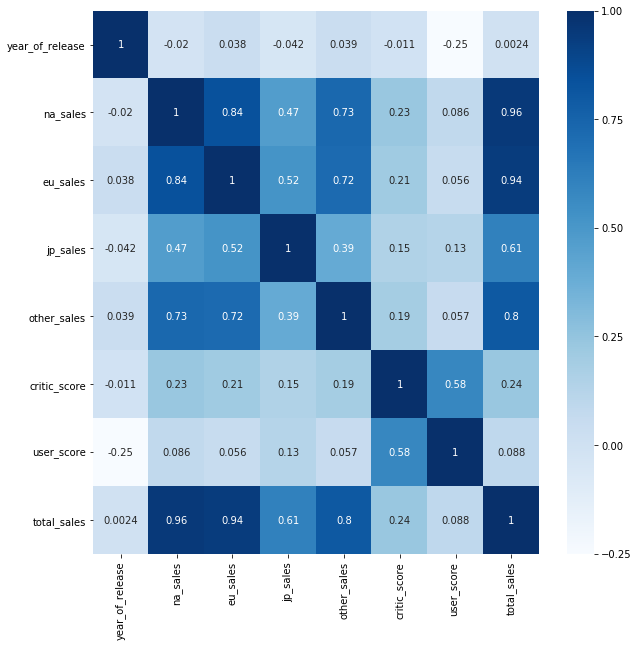

In [45]:
#посторим матрицу корреляций для всего датасета для выявления общего тренда
games_pos_scores = games[(games['user_score'] > 0) & (games['critic_score'] > 0)]
plt.figure(figsize=(10,10))
sns.heatmap(games_pos_scores.corr(), cmap = "Blues", annot=True)

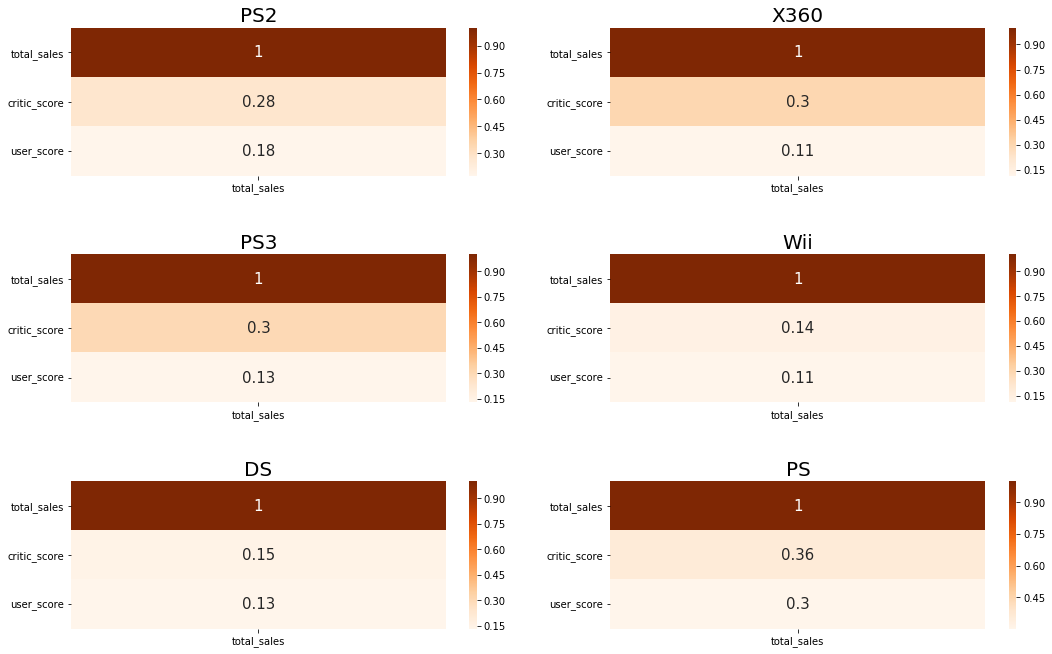

In [51]:
#сравним с корреляциями между отзывами и продажами по другим платформам
largest_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize = (16,10))
count = 0
for i in range(rows):
    for n in range(cols):
        platform_name = largest_platforms[count]
        games_filt = games[(games['platform'] == platform_name) & (games['user_score'] > 0)].copy()
        games_filt_columns = games_filt[['total_sales', 'user_score', 'critic_score']]
        ax = sns.heatmap(games_filt_columns.corr()[['total_sales']].sort_values(by='total_sales', ascending = False), cmap="Oranges", annot=True, annot_kws={'size':15}, ax = axes[i,n])
        ax.set_title(platform_name, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=4)
        count += 1

Наиболее тесная положительная корреляция между оценками пользователей и продажами наблюдается для игр на платформах PS и PS2. В целом для всех платформ корреляция между данными переменными положительная и находится в диапазоне от 0.13 до 0.17. Оценки критиков оказывают наибольший эффект на продажи игр для платформ PS (коэффициент корреляции составляет 0.36), PS3 и X360 (коэффициенты корреляции составляют 0.3 для каждой из платформ), PS2 (коэффициент корреляции составляет 0.28). При этом в целом на всей представленной выборке игровых платформ оценки критиков оказывают больший эффект на продажи, чем оценки пользователей.

## 3.5 Анализ игр по жанрам
<a name="subparagraph8"></a>

In [52]:
#создадим сводную таблицу с совокупной стоимостью продаж для каждого жанра
sales_per_genre = games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
sales_per_genre = sales_per_genre.reset_index().rename_axis()
sales_per_genre

,genre,total_sales
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


Text(0, 0.5, 'Стоимость продаж')

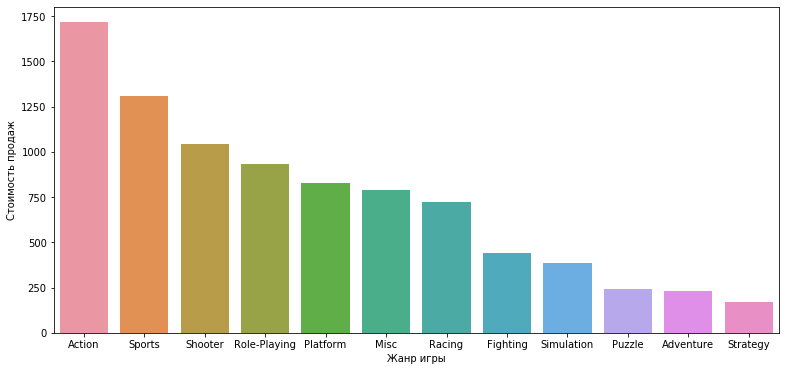

In [53]:
#построим столбчатую диаграмму
plt.figure(figsize=(13,6))
sns.barplot(data = sales_per_genre, x = 'genre', y = 'total_sales')
plt.xlabel('Жанр игры')
plt.ylabel('Стоимость продаж')

Максимальные продажи наблюдаются в жанре 'action'. Минимальным спросом пользователей жанр стратегии.

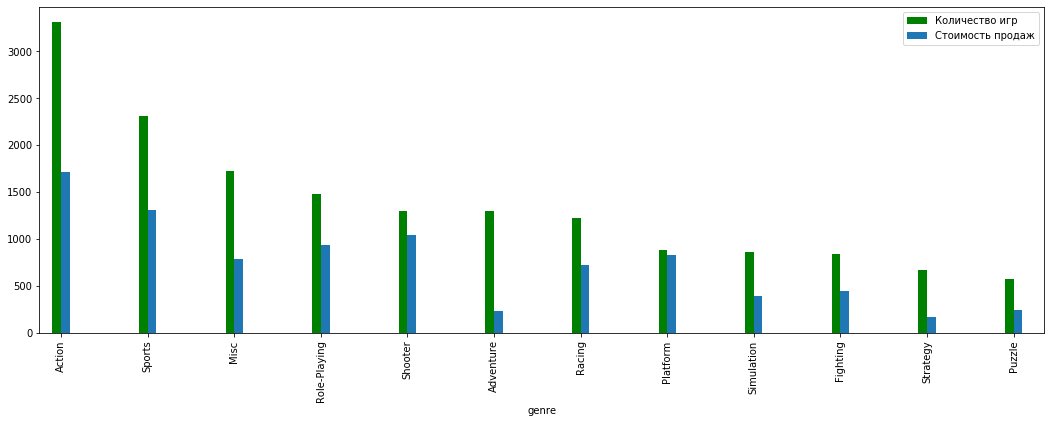

In [54]:
#Посмотрим на количество игр в жанре и cтоимость продажи в жанре
ax = plt.gca()

genre_pivot = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

genre_pivot['name'].plot(kind = 'bar', figsize=(18,6), ax=ax, width=0.1, color='green', position=1)

genre_pivot['total_sales'].plot(kind = 'bar', figsize=(18,6),ax=ax, width=0.1, position=0)

ax.legend(['Количество игр', 'Стоимость продаж'])

In [55]:
mean_sales_genre = games.groupby('genre').agg({'total_sales': 'mean'}).sort_values(by='total_sales', ascending=False)
display(mean_sales_genre)

,total_sales
genre,
Platform,0.940262
Shooter,0.803519
Role-Playing,0.628683
Racing,0.590122
Sports,0.567940
Fighting,0.528865
Action,0.519057
Misc,0.459204
Simulation,0.452695


Наибольшое число игр принадлежит жанрам экшн и спорт, при этом они приносят наибольшую совокупную выручку, в частности, в силу приемлимого ценника(средняя стоимость игр данных жанров значительно ниже цены игр платформенных жанров, шутеров или ролевых игр). При этом игры спортивного жанра дороже, чем игры жанра экшн (средняя выручка на игру для жанра спорт - 0,57, для жанра экшн - 0,52). 

**Выводы**
    
- спрос на игровые платформы стал активно возрастать в конце 90-х - начале 2000-х по. Однако уже с 2010 г. наблюдается постепенное снижение интереса пользователей к играм, что вероятно связано с появлением игр на мобильных телефонах или с тем, что на разработку стало уходить больше времени и ресурсов;

- наиболее популярные платформы, которые еще не завершили цикл замедления продаж - PS4 и XOne;
    
- в среднем цикл существования платформы на рынке соответствует 10 годам с наступлением пика продаж через 5 лет после выхода игры на рынок; 

- для большей части платформ наблюдается положительная, но слабая корреляция между оценками пользователей и объемами продаж, корреляция объема продаж с оценками критиков значительно более тесная.

Шаг 4. Составление портрета пользователя для каждого региона<a name="paragraph5"></a>
===========================
Для каждого региона (Северная Америка, Европа, Япония) определим: 
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- влияние рейтинга (ESRB) 

Произведем актуализацию данных, взяв период с 2012 г.

In [56]:
actual_games = actual_games.query('year_of_release > 2012')

## 4.1 Предварительная обработка данных
<a name="subparagraph9"></a>

In [57]:
#посмотрим на значения в столбце с рейтингом ESRB
actual_games = actual_games[actual_games['rating']!= -1]
actual_games['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

In [58]:
#сопоставим данный список с соответствующими названиями из статьи о ESRB в Википедии
rating_dict = {'E': 'Для всех', 'M': 'Cтарше 17', 'T': '13-19 лет', 'E10+': 'Старше 10 лет', 'K-A': 'Для всех', 'AO': 'Старше 18', 'EC': 'Дошкольники', 'RP': 'Не определен'}

In [59]:
#cоздадим столбец с соответсвующими названиями
actual_games['ESRB_definition'] = actual_games[actual_games['rating'].notnull()]['rating'].map(rating_dict)

## 4.2 Написание функции для отрисовки графиков для каждого региона
<a name="subparagraph10"></a>

In [60]:
def best_for_regions(column, region, ax):
        sales_for_region = actual_games.groupby(column).agg({region: 'sum'}).sort_values(by=region, ascending = False)[:6]
        titles_dict = {'na_sales' : 'Продажи в Северной Америке', 'eu_sales' : 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
        color_dict = {'na_sales': 'green', 'eu_sales': 'red', 'jp_sales': 'grey'}
        bar_plot = sales_for_region.plot(kind = 'bar', title = titles_dict[region], ax=axes[ax], color = color_dict[region])

## 4.3 Выявление самых популярных платформ в регионах
<a name="subparagraph11"></a>

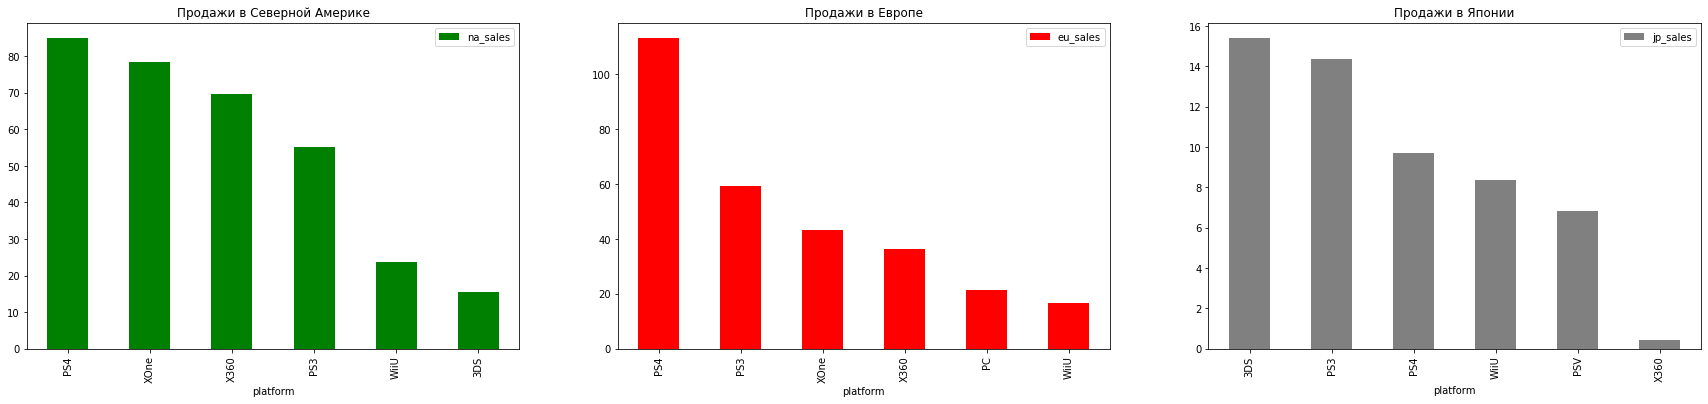

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))
best_for_regions('platform', 'na_sales', 0)
best_for_regions('platform', 'eu_sales', 1)
best_for_regions('platform', 'jp_sales', 2)

- В Северной Америке лидерами продаж являются игры на платформах PS4 и XOne, за ними следуют платформы X360, PS3 и WiiU. 
- В Европе по продажам лидируют игра на платформах PS4 и PS3, за ними следуют игры на плафтормах XOne, X360 и PC. 
- В Японии, напротив, основным лидером являются игры на платформе 3DS,  на третьем и четвертом месте - игры на платформах PS4 и WiiU.

## 4.4 Выявление самых популярных жанров в регионах
<a name="subparagraph12"></a>

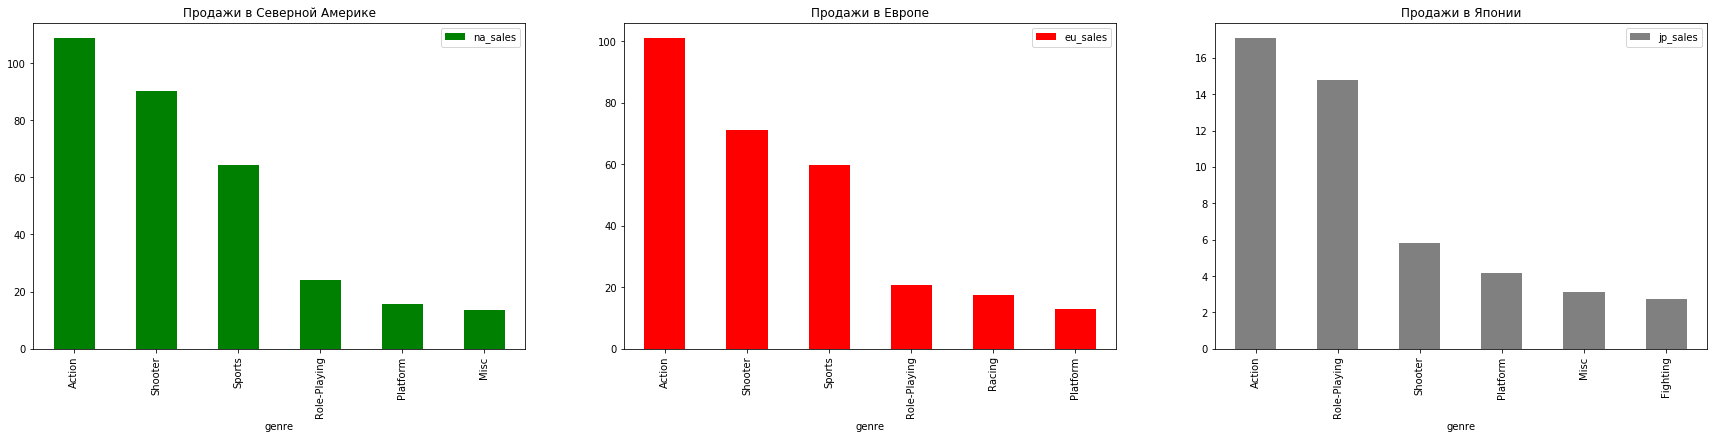

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))
best_for_regions('genre', 'na_sales', 0)
best_for_regions('genre', 'eu_sales', 1)
best_for_regions('genre', 'jp_sales', 2)

- Как в Северной Америке, так и в Европе первые три лидирущие позиции занимают игры в жанрах экшн, шутеры и спорт. 
- В Японии лидируют ролевые игры и игры в жанре экшн. За ними по популярности следуют платформенные и спортивные игры.

**4.5 Выявление влияния рейтинга на продажи в отдельном регионе**<a name="subparagraph13"></a>

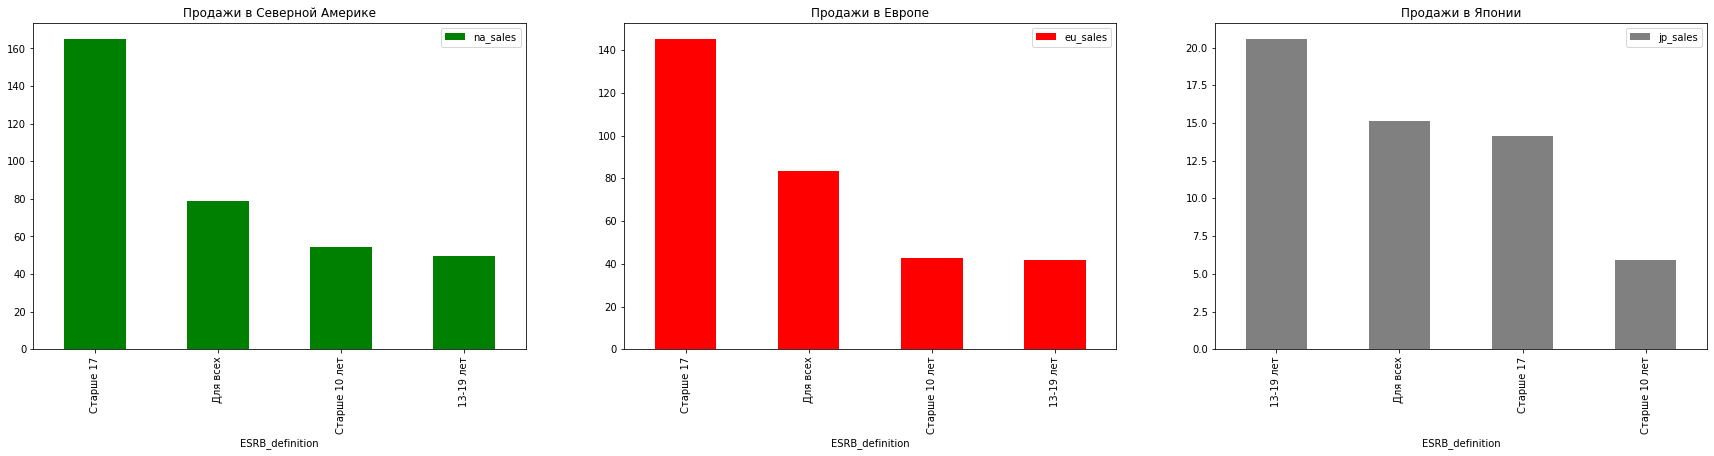

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))
best_for_regions('ESRB_definition', 'na_sales', 0)
best_for_regions('ESRB_definition', 'eu_sales', 1)
best_for_regions('ESRB_definition', 'jp_sales', 2)

В Северной Америке, Европе наибольшая доля выручки приходится на игры для для возраста старше 17 лет, в Японии - на игры, ориентированные на пользователей от 13 до 19 лет.

Шаг 5. Проверка гипотез<a name="paragraph6"></a>
===========================
Осуществим проверку следующих гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## 5.1 Проверка первой гипотезы
<a name="subparagraph14"></a>

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны. <br/>
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются. <br/>
Поскольку у нас независимые выборки, произведем проверку с помощью критерия Стьюдента. Параметр alpha установим на уровне в 5%. 

In [64]:
#осуществим срез данных для формирования двух выборок в актуальный для нас период после 2006 г.
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [65]:
xbox_rating = games[(games['platform'] == 'XOne') & (games['year_of_release'] > 2012) & (games['year_of_release'] <= 2016) & (games['user_score'] != -1)]['user_score']
pc_rating = games[(games['platform'] == 'PC') & (games['year_of_release'] > 2012) & (games['year_of_release'] <= 2016) & (games['user_score'] != -1)]['user_score']

In [66]:
#до осуществления проверки гипотезы с помощью критерия Стьюдента осуществим проверку на равенство дисперсий с помошью теста Левена
from scipy import stats as st
from scipy.stats import levene
alpha = 0.05
stat, p = levene(xbox_rating, pc_rating)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Результаты тесты Левена указывают на равенство дисперсий в двух выборках. Соответственно в методе scipy.stats.ttest_ind (array1, array2, equal_var) оставим параметр equal_var без изменений, поскольку по дефолту он равен True.

In [67]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(xbox_rating, pc_rating, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Таким образом, гипотеза о равенстве оценок пользователей игр для платформ Xbox One и PC не отвергается

In [68]:
print('Средняя оценка пользователей плафтормы Xbox One - {:.2f}'.format(xbox_rating.mean()))
print('Средняя оценка пользователей платформы PC - {:.2f}'.format(pc_rating.mean()))

Средняя оценка пользователей плафтормы Xbox One - 6.52
Средняя оценка пользователей платформы PC - 6.27


## 5.2 Проверка второй гипотезы
<a name="subparagraph15"></a>
H0: cредние рейтинги пользователей для жанров Action и Sports равны.<br/>
H1: средние рейтинги пользователей для жанров Action и Sports различаются.

In [69]:
#осуществим срез данных для формирования двух выборок в актуальный для нас период после 2000 г.
action_score = games[(games['genre'] == 'Action') & (games['year_of_release'] > 2012) & (games['year_of_release'] <= 2016) & (games['user_score'] != -1)]['user_score']
sports_score = games[(games['genre'] == 'Sports') & (games['year_of_release'] > 2012) & (games['year_of_release'] <= 2016) & (games['user_score'] != -1)]['user_score']

In [70]:
#до осуществления проверки гипотезы с помощью критерия Стьюдента осуществим проверку на равенство дисперсий с помошью теста Левена
from scipy import stats as st
from scipy.stats import levene
alpha = 0.05
stat, p = levene(action_score, sports_score)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Результаты тесты Левена указывают на неравенство дисперсий в двух выборках. Соответственно в методе scipy.stats.ttest_ind (array1, array2, equal_var) установим параметр equal_var равным False.

In [71]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(action_score, sports_score, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Таким образом, гипотеза о равенстве оценок пользователей для игр жанра Action и Sports отвергается. Проверим, для какого жанра оценки выше. 

In [72]:
print('Средняя оценка игр жанра Action - {:.2f}'.format(action_score.mean()))
print('Средняя оценка игр жанра Sports - {:.2f}'.format(sports_score.mean()))

Средняя оценка игр жанра Action - 6.84
Средняя оценка игр жанра Sports - 5.24


Шаг 6. Формулирование выводов<a name="paragraph6"></a>
===========================

В результате проведенного анализа можно заключить, что:
1. Пик популярности компьютерных игр пришелся на 2008-2009 гг. После 2011 г. спрос на компьютерные игры стал резко снижаться, что вероятно обусловлено появлением мобильных телефонов, а также ростом популярности иных форм развлечений, таких как социальные сети и видеохостинги. 
2. В среднем цикл существования игры на рынке равен 10 годам, при этом пик продаж наступает через 5 лет после выхода игры на рынок. 
3. За весь рассматриваемый период наибольшую популярность у пользователей имели игры на платформах PS2, X360, PS3, Wii, DS и PS. За последние 10 лет наибольшую популярность приобрели платформы XOne и PS4.
4. Наблюдается положительная корреляция между оценками пользователей и критиков и продажами игр: чем выше данные оценки, тем выше продажи. При этом оценки критиков более тесно связаны с объемами продаж, чем оценки пользователей. 
5. Наибольшей популярностью у пользователей всех игровых платформ пользуется жанр Action. 
6. В Северной Америке наиболее популярными являются игры на платформах X360 и Wii, наиболее популярные жанры экшн, спорт и шутеры. С точки зрения рейтинга пользователи предпочитают игры с рейтингом «для всех».
7. В Европе самыми популярными платформами являются платформы PS3 и X360, наиболее популярные жанры, как и в Северной Америке – экшн, спорт и шутеры. С точки зрения рейтинга пользователи отдают наибольшее предпочтение, как и в Северной Америке, играм с рейтингом «для всех». 
8. В Японии наиболее популярными являются игры на платформах PS3, Wii, наиболее популярные жанры – ролевые игры, экшн и спортивные игры. С точки зрения рейтинга пользователи предпочитают игры с рейтингом «для всех».

Таким образом, можно предположить, что наиболее перспективными для продажи в будущем являются игры на платформах PS4 и Xone, в жанре экшн. 